In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

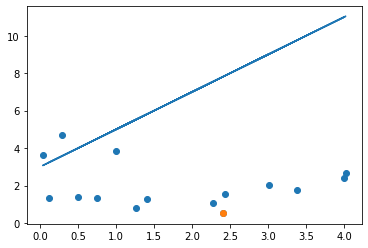

In [75]:
def dist_to_line(pt, m, b):
    line = lambda x : m * x + b
    x_0, y_0 = pt
    x = (x_0 + m * (b - y_0)) / (1 + m * m)
    y = line(x)
    closest_pt = (x, y)
    return (x - x_0) ** 2 + (y - y_0) ** 2

def furthest_point(points, m, b):
    max_dist = -float("inf")
    pt = None
    if len(points.shape) < 1:
        return None
    
    num_points = points.shape[0]
    for i in range(num_points):
        pt = points[i,:]
        dist = dist_to_line(pt, m, b)
        if dist > max_dist:
            best_pt = pt
            max_dist = dist
    return best_pt

m = 2.0
b = 3.0
line = lambda x : m * x + b

x_range = 5.0
num_points = 15
points = x_range * np.random.random((num_points, 2))

best_pt = furthest_point(points, m, b)

plt.scatter(points[:,0:1], points[:,1:2])
plt.scatter(best_pt[0], best_pt[1])
plt.plot(points[:,0:1], line(points[:,0:1]))
plt.show()

In [80]:
def get_line(pts):
    pt0, pt1 = pts
    x0, y0 = pt0
    x1, y1 = pt1
    m = (y1 - y0) / (x1 - x0)
    b = y0 - m * x0
    return (m, b)

def plot_line(points):
    m, b = get_line(points)
    line_fn = lambda x : m * x + b 
    points = np.array(points)
    plt.scatter(points[:,0:1], points[:,1:2])
    plt.plot(points[:,0:1], line_fn(points[:,0:1]))

def find_hull(prev_endpoints, points, endpoints):
    m, b = get_line(prev_endpoints)
    line_fn = lambda x : m * x + b
    
    above = []
    below = []
    for point in points:
        if (point == prev_endpoints).any():
            continue
        x, y = point
        if above and line_fn(x) > y: # line is below the point
            below.append(point)
        elif not above and line_fn(x) < y:
            above.append(point)
    
    above = np.array(above)
    below = np.array(below)
    
    lowest_pt = furthest_point(below, m, b)
    highest_pt = furthest_point(subset, m, b)
    
    if lowest_pt is not None:
        endpoints.append(lowest_pt)
        find_hull([prev_endpoints[0], lowest_pt], below, endpoints)
    if highest_pt is not None:
        endpoints.append(highest_pt)
        find_hull([highest_pt, prev_endpoints[1]], above, endpoints)
        
sorted_points = sorted(points, key=lambda x : x[0])
hull = [sorted_points[0], sorted_points[-1]]
endpoints = []
find_hull(hull, sorted_points, endpoints)
for endpoint in endpoints:
    plot_line(endpoint)
plt.show()

NameError: name 'subset' is not defined